Dataset 

In [1]:
import pandas as pd
import random
import tkinter as tk
from tkinter import filedialog

# Function to generate synthetic user activity data
def generate_user_activity(num_users):
    data = {'UserID': [], 'CourseViews': [], 'TimeSpent': [], 'QuizScores': []}

    for user_id in range(1, num_users + 1):
        data['UserID'].append(user_id)
        data['CourseViews'].append(random.randint(1, 100))
        data['TimeSpent'].append(random.uniform(1, 10))
        data['QuizScores'].append(random.uniform(0, 100))

    return pd.DataFrame(data)

# Function to generate synthetic user response data
def generate_user_responses(num_users):
    data = {'UserID': [], 'Ratings': [], 'Feedback': []}

    for user_id in range(1, num_users + 1):
        data['UserID'].append(user_id)
        data['Ratings'].append(random.randint(1, 5))
        data['Feedback'].append(f"Feedback for user {user_id}")

    return pd.DataFrame(data)

# Merge user activity and user response data
def merge_datasets(activity_data, response_data):
    return pd.merge(activity_data, response_data, on='UserID')

# Function to calculate accuracy (dummy function for demonstration)
def calculate_accuracy(dataset):
    # Dummy accuracy calculation
    return random.uniform(0, 1)

# Function to save the dataset to CSV
def save_dataset(dataset):
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    file_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])

    if file_path:
        dataset.to_csv(file_path, index=False)
        print(f"Dataset saved successfully at: {file_path}")
        return file_path
    else:
        print("Saving dataset canceled.")
        return None

# Generate synthetic data
num_users = 100
activity_data = generate_user_activity(num_users)
response_data = generate_user_responses(num_users)
dataset = merge_datasets(activity_data, response_data)

# Save the dataset to CSV
saved_file_path = save_dataset(dataset)

# Calculate and print accuracy
if saved_file_path:
    accuracy = calculate_accuracy(dataset)
    print(f"Accuracy of the dataset: {accuracy}")


Dataset saved successfully at: D:/Mini Project/Shyam/Assignment/user_data.csv
Accuracy of the dataset: 0.512930511873429


Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to load the dataset from a user-defined location
def load_dataset():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])

    if file_path:
        return pd.read_csv(file_path)
    else:
        print("Loading dataset canceled.")
        return None

# Function to clean and preprocess the dataset
def preprocess_dataset(dataset):
    dataset.fillna(0, inplace=True)  

    for column in dataset.columns:
        if dataset[column].dtype in [np.float64, np.int64]:
            percentile_99 = np.percentile(dataset[column], 99)
            dataset[column] = np.where(dataset[column] > percentile_99, percentile_99, dataset[column])
    dataset['NewFeature'] = dataset['TimeSpent'] * dataset['QuizScores']

    return dataset

# Function to split the dataset and train a model (dummy model for demonstration)
def train_model(dataset):
    X = dataset.drop(columns=['Ratings', 'Feedback'])
    y = dataset['Ratings']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Load the dataset
dataset = load_dataset()

# Check if the dataset is loaded successfully
if dataset is not None:
    # Preprocess the dataset
    cleaned_dataset = preprocess_dataset(dataset)

    # Save the cleaned dataset to a user-defined location
    save_location = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if save_location:
        cleaned_dataset.to_csv(save_location, index=False)
        print(f"Cleaned dataset saved successfully at: {save_location}")

        # Train a model and print the accuracy
        model_accuracy = train_model(cleaned_dataset)
        print(f"Accuracy of the cleaned dataset: {model_accuracy}")
    else:
        print("Saving cleaned dataset canceled.")


Cleaned dataset saved successfully at: D:/Mini Project/Shyam/Assignment/cleaned_user_data.csv
Accuracy of the cleaned dataset: 0.25


Future Engineering

In [3]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to load the dataset from a user-defined location
def load_dataset():
    root = tk.Tk()
    root.withdraw()

    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])

    if file_path:
        return pd.read_csv(file_path)
    else:
        print("Loading dataset canceled.")
        return None

# Function to extract meaningful features and scale numerical features
def feature_engineering(dataset):
    dataset['FeedbackLength'] = dataset['Feedback'].apply(lambda x: len(str(x)))

    numerical_features = ['CourseViews', 'TimeSpent', 'QuizScores', 'FeedbackLength']
    scaler = StandardScaler()
    dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

    return dataset

# Function to split the dataset and train a model (dummy model for demonstration)
def train_model(dataset):
    X = dataset.drop(columns=['Ratings', 'Feedback'])
    y = dataset['Ratings']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dummy model (you should replace this with your actual model training)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Load the dataset
dataset = load_dataset()

# Check if the dataset is loaded successfully
if dataset is not None:
    # Perform feature engineering
    engineered_dataset = feature_engineering(dataset)

    # Save the engineered dataset to a user-defined location
    save_location = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
    if save_location:
        engineered_dataset.to_csv(save_location, index=False)
        print(f"Engineered dataset saved successfully at: {save_location}")

        # Train a model and print the accuracy
        model_accuracy = train_model(engineered_dataset)
        print(f"Accuracy of the engineered dataset: {model_accuracy}")
    else:
        print("Saving engineered dataset canceled.")


Engineered dataset saved successfully at: D:/Mini Project/Shyam/Assignment/updated_dataset.csv
Accuracy of the engineered dataset: 0.2


Training Model

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tkinter import filedialog
import tkinter as tk

# Function to load the dataset from a user-defined location
def load_dataset():
    root = tk.Tk()
    root.withdraw() 
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])

    if file_path:
        return pd.read_csv(file_path)
    else:
        print("Loading dataset canceled.")
        return None

# Function to preprocess and engineer features
def preprocess_and_engineer(dataset):
    dataset['FeedbackLength'] = dataset['Feedback'].apply(lambda x: len(str(x)))

    numerical_features = ['CourseViews', 'TimeSpent', 'QuizScores', 'FeedbackLength']
    scaler = StandardScaler()
    dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

    return dataset

# Function to train a machine learning model
def train_model(dataset):
    X = dataset.drop(columns=['Ratings', 'Feedback'])
    y = dataset['Ratings']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training (you can replace RandomForestClassifier with your preferred model)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Print the name of the used model
    model_name = model.__class__.__name__
    print(f"Used Machine Learning Model: {model_name}")

    # Model prediction
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy

# Load the dataset
dataset = load_dataset()

# Check if the dataset is loaded successfully
if dataset is not None:
    # Preprocess and engineer features
    preprocessed_dataset = preprocess_and_engineer(dataset)

    # Train the machine learning model
    trained_model, model_accuracy = train_model(preprocessed_dataset)

    print(f"Model trained with accuracy: {model_accuracy}")

else:
    print("Model training canceled.")


Used Machine Learning Model: RandomForestClassifier
Model trained with accuracy: 0.2


Model Evaluation

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tkinter import filedialog
import tkinter as tk
import joblib 

# Function to load the dataset from a user-defined location
def load_dataset():
    root = tk.Tk()
    root.withdraw()  
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])

    if file_path:
        return pd.read_csv(file_path)
    else:
        print("Loading dataset canceled.")
        return None

# Function to preprocess and engineer features
def preprocess_and_engineer(dataset):
    dataset['FeedbackLength'] = dataset['Feedback'].apply(lambda x: len(str(x)))

    numerical_features = ['CourseViews', 'TimeSpent', 'QuizScores', 'FeedbackLength']
    scaler = StandardScaler()
    dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

    return dataset

# Function to train a machine learning model
def train_model(dataset):
    X = dataset.drop(columns=['Ratings', 'Feedback'])
    y = dataset['Ratings']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training (you can replace RandomForestClassifier with your preferred model)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Model prediction
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    mse = mean_squared_error(y_test, y_pred)

    print(f"Model Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Mean Squared Error: {mse}")

    # Print the name of the used model
    model_name = model.__class__.__name__
    print(f"Used Machine Learning Model: {model_name}")

    return model

# Function to save the trained model in a user-defined location
def save_model(trained_model):
    root = tk.Tk()
    root.withdraw()  

    file_path = filedialog.asksaveasfilename(defaultextension=".joblib", filetypes=[("Joblib files", "*.joblib")])

    if file_path:
        joblib.dump(trained_model, file_path)
        print(f"Trained model saved successfully at: {file_path}")
    else:
        print("Saving trained model canceled.")

# Load the dataset
dataset = load_dataset()

# Check if the dataset is loaded successfully
if dataset is not None:
    # Preprocess and engineer features
    preprocessed_dataset = preprocess_and_engineer(dataset)

    # Train the machine learning model
    trained_model = train_model(preprocessed_dataset)

    # Save the trained model to a user-defined location
    save_model(trained_model)

else:
    print("Model training canceled.")


Model Evaluation:
Accuracy: 0.15
Precision: 0.1625
Recall: 0.15
Mean Squared Error: 3.5
Used Machine Learning Model: RandomForestClassifier
Trained model saved successfully at: D:/Mini Project/Shyam/Assignment/Trained_Model.joblib


Model Tuning

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tkinter import filedialog
import tkinter as tk
import joblib

# Function to load the dataset from a user-defined location
def load_dataset():
    root = tk.Tk()
    root.withdraw()  
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])

    if file_path:
        return pd.read_csv(file_path)
    else:
        print("Loading dataset canceled.")
        return None

# Function to preprocess and engineer features
def preprocess_and_engineer(dataset):
    dataset['FeedbackLength'] = dataset['Feedback'].apply(lambda x: len(str(x)))

    numerical_features = ['CourseViews', 'TimeSpent', 'QuizScores', 'FeedbackLength']
    scaler = StandardScaler()
    dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

    return dataset

# Function to train a machine learning model
def train_model(dataset):
    X = dataset.drop(columns=['Ratings', 'Feedback'])
    y = dataset['Ratings']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model training (you can replace RandomForestClassifier with your preferred model)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Model prediction
    y_pred = model.predict(X_test)

    # Evaluate the original model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    mse = mean_squared_error(y_test, y_pred)

    print(f"Original Model Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Mean Squared Error: {mse}")

    # Print the name of the used model
    model_name = model.__class__.__name__
    print(f"Used Machine Learning Model: {model_name}")

    return model

# Function to save the trained model in a user-defined location
def save_model(trained_model):
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    file_path = filedialog.asksaveasfilename(defaultextension=".joblib", filetypes=[("Joblib files", "*.joblib")])

    if file_path:
        joblib.dump(trained_model, file_path)
        print(f"Trained model saved successfully at: {file_path}")
    else:
        print("Saving trained model canceled.")

# Load the dataset
dataset = load_dataset()

# Check if the dataset is loaded successfully
if dataset is not None:
    # Preprocess and engineer features
    preprocessed_dataset = preprocess_and_engineer(dataset)

    # Train the original machine learning model
    original_model = train_model(preprocessed_dataset)

    # Save the original trained model to a user-defined location
    save_model(original_model)

    # Hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(preprocessed_dataset.drop(columns=['Ratings', 'Feedback']), preprocessed_dataset['Ratings'])

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Train the model with the best hyperparameters
    tuned_model = train_model(preprocessed_dataset)

    # Save the tuned model to a user-defined location
    save_model(tuned_model)

    # Print the best hyperparameters from GridSearchCV
    print("Best Hyperparameters:")
    print(grid_search.best_params_)

else:
    print("Model training canceled.")


Original Model Evaluation:
Accuracy: 0.1
Precision: 0.1
Recall: 0.1
Mean Squared Error: 4.6
Used Machine Learning Model: RandomForestClassifier
Trained model saved successfully at: D:/Mini Project/Shyam/Assignment/Trained_Model.joblib
Original Model Evaluation:
Accuracy: 0.15
Precision: 0.13428571428571429
Recall: 0.15
Mean Squared Error: 4.3
Used Machine Learning Model: RandomForestClassifier
Trained model saved successfully at: D:/Mini Project/Shyam/Assignment/Tuning_Model.joblib
Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


Results Visualisation

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          100 non-null    int64  
 1   CourseViews     100 non-null    float64
 2   TimeSpent       100 non-null    float64
 3   QuizScores      100 non-null    float64
 4   Ratings         100 non-null    int64  
 5   Feedback        100 non-null    object 
 6   FeedbackLength  100 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.6+ KB
None

First few rows of the dataset:
   UserID  CourseViews  TimeSpent  QuizScores  Ratings             Feedback  \
0       1     0.201632  -1.723278    1.138748        4  Feedback for user 1   
1       2     0.370787   1.005891    0.812408        5  Feedback for user 2   
2       3    -1.422253  -0.764283    0.386582        5  Feedback for user 3   
3       4     0.404618   1.199779   -0.396782        4  

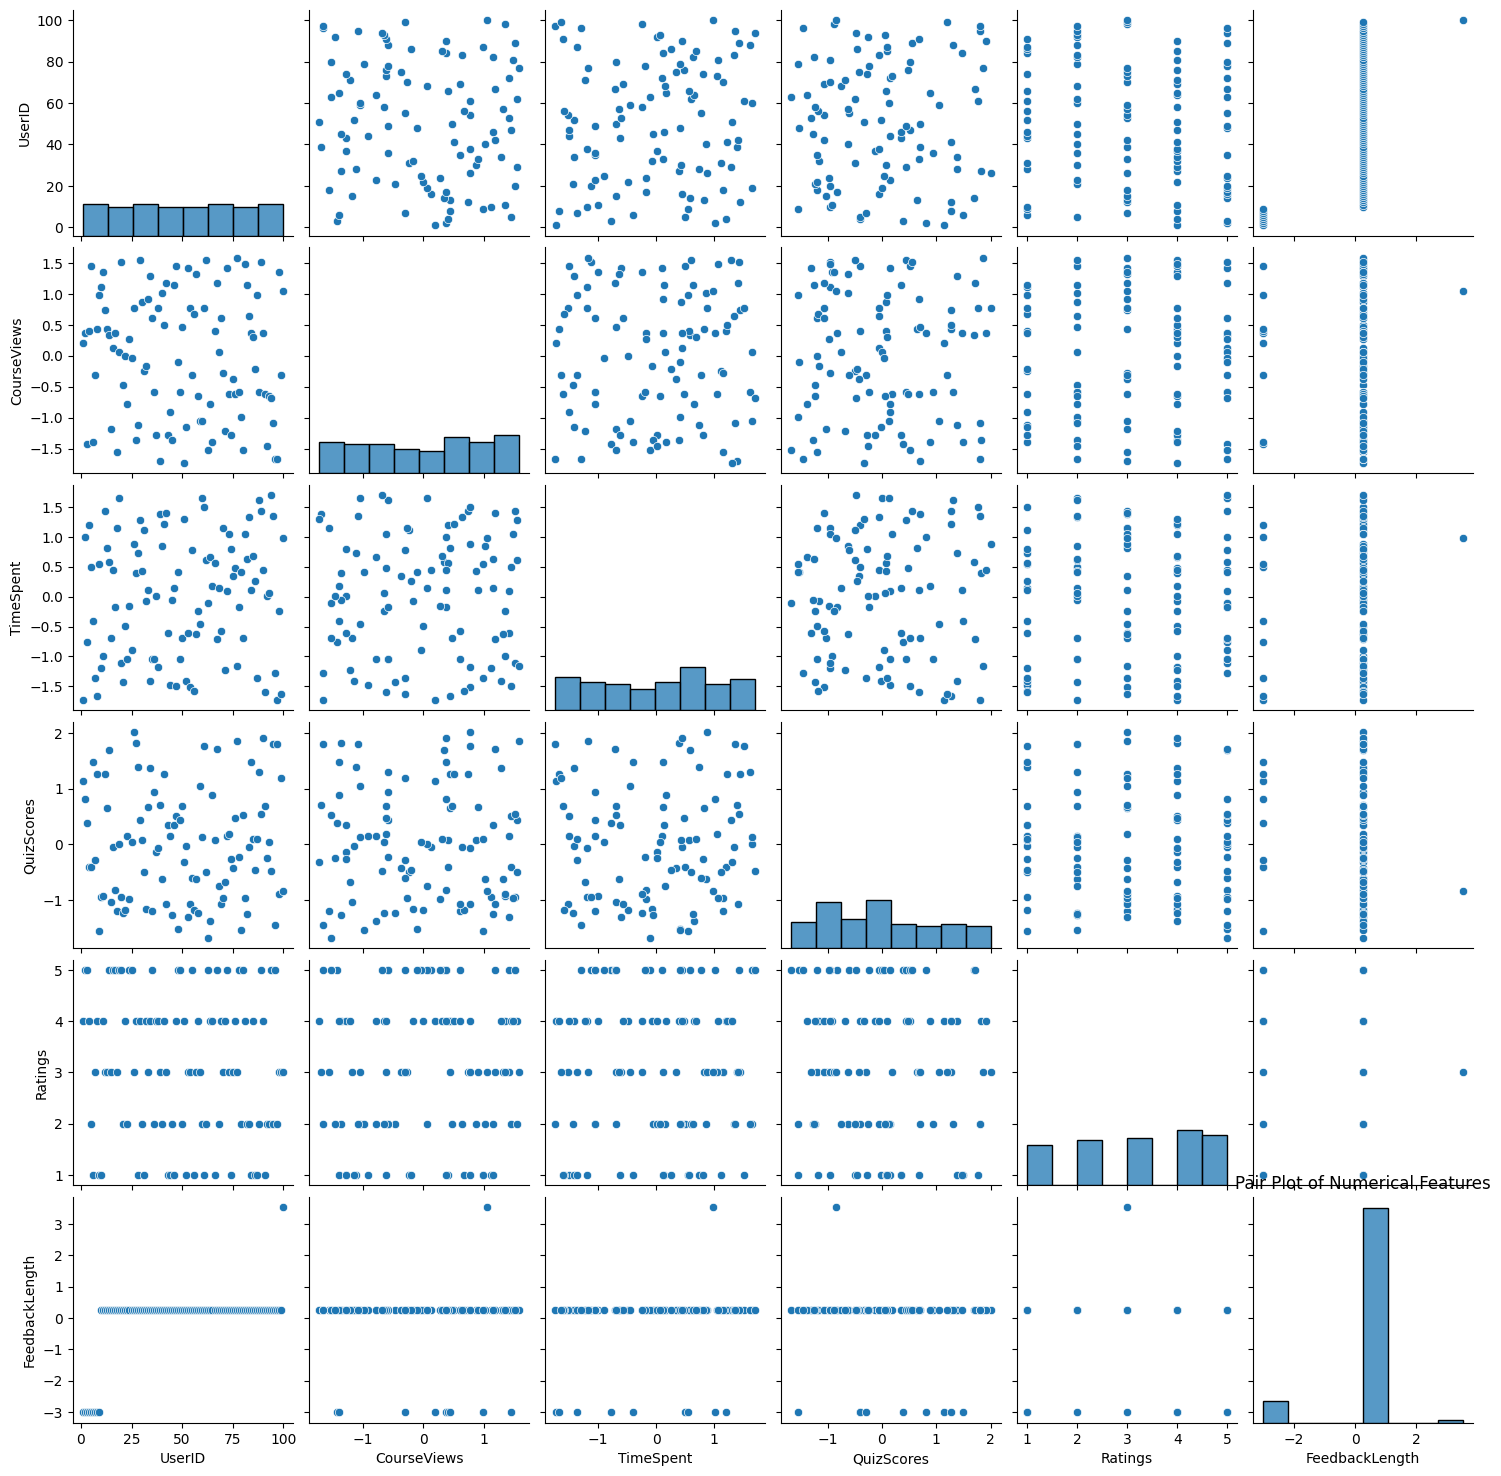

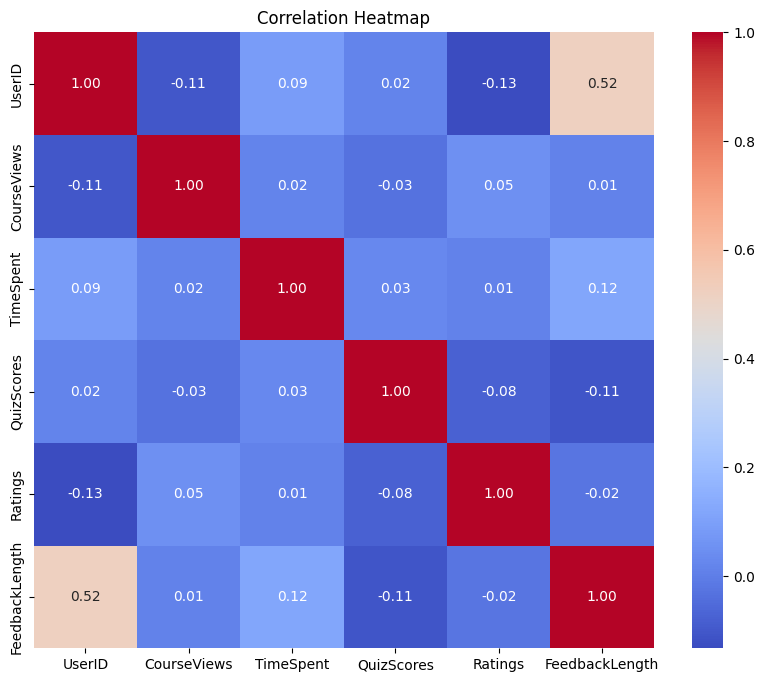

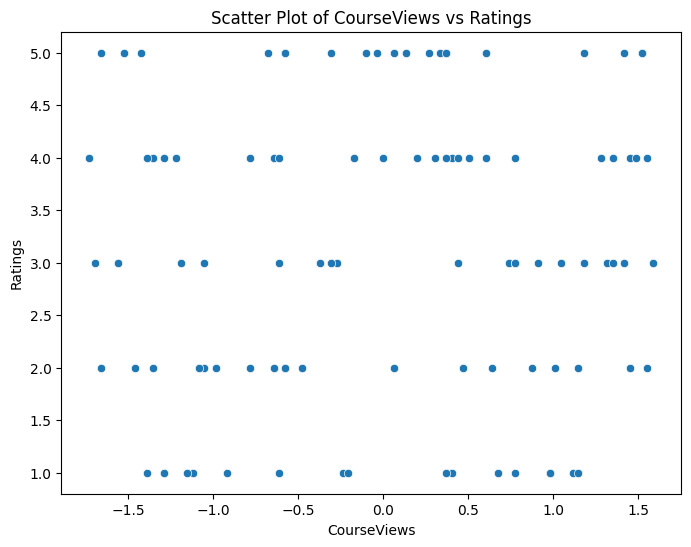

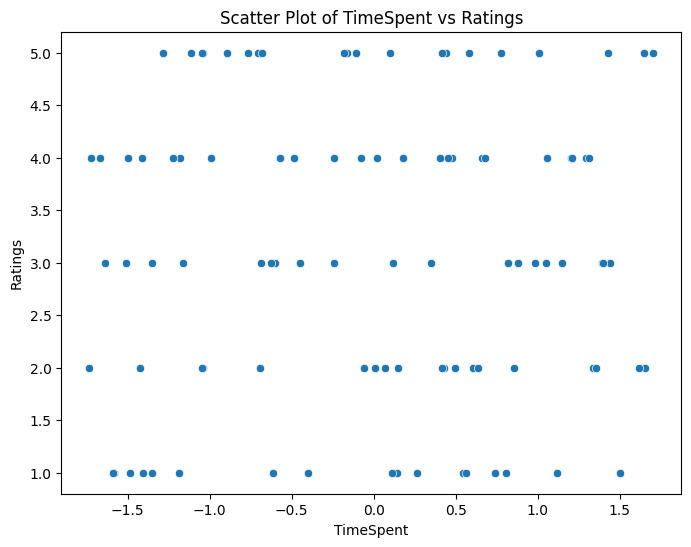

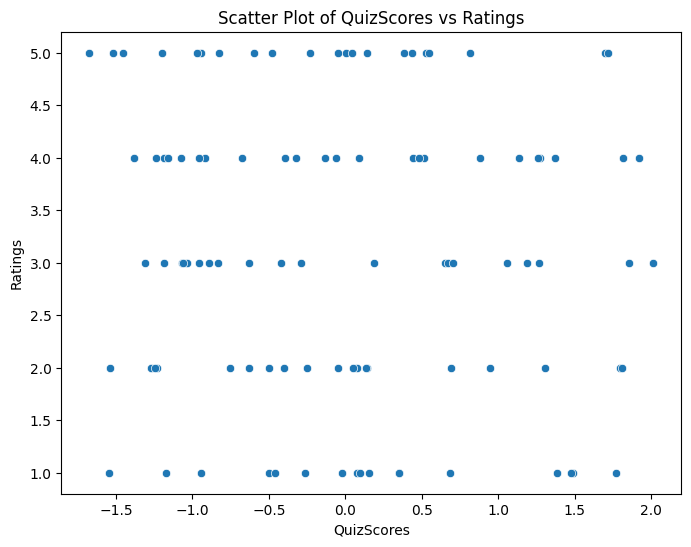

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import filedialog
import tkinter as tk

def load_dataset():
    root = tk.Tk()
    root.withdraw() 

    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])

    if file_path:
        return pd.read_csv(file_path)
    else:
        print("Loading dataset canceled.")
        return None

# Load the dataset
dataset = load_dataset()

# Check if the dataset is loaded successfully
if dataset is not None:
    # Display basic information about the dataset
    print("Dataset Information:")
    print(dataset.info())

    # Display the first few rows of the dataset
    print("\nFirst few rows of the dataset:")
    print(dataset.head())

    # Plot a pair plot for numerical features
    sns.pairplot(dataset)
    plt.title('Pair Plot of Numerical Features')
    plt.show()

    # Plot a correlation heatmap for numerical features
    numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = dataset[numerical_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

    # Plot scatter plots for selected numerical features
    selected_numerical_features = ['CourseViews', 'TimeSpent', 'QuizScores']

    for feature in selected_numerical_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=feature, y='Ratings', data=dataset)
        plt.title(f'Scatter Plot of {feature} vs Ratings')
        plt.show()

else:
    print("Dataset loading canceled.")
